<a href="https://colab.research.google.com/github/FaizFP/Dicoding---Capstone/blob/coba-coba/Coba_Coba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import**

In [30]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

**Load Data**

In [31]:
path = kagglehub.dataset_download("vijayuv/onlineretail")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'onlineretail' dataset.
Path to dataset files: /kaggle/input/onlineretail


In [32]:
df = pd.read_csv('/kaggle/input/onlineretail/OnlineRetail.csv', encoding='ISO-8859-1')
print("Data Awal:", df.shape)
df.head()

Data Awal: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Exploration Data dan Data Cleaning**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [34]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [35]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [36]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [37]:
jumlah_duplikat = df.duplicated().sum()
print(f"Total data duplikat: {jumlah_duplikat} baris")

Total data duplikat: 5268 baris


In [38]:
data_duplikat = df[df.duplicated(keep=False)]
print(data_duplikat.sort_values(by='CustomerID').head(10))

       InvoiceNo StockCode                        Description  Quantity  \
395442    571034     23494   VINTAGE DOILY DELUXE SEWING KIT          3   
395443    571034     23494   VINTAGE DOILY DELUXE SEWING KIT          3   
395455    571034     23245         SET OF 3 REGENCY CAKE TINS         4   
395388    571034     23239  SET OF 4 KNICK KNACK TINS POPPIES         6   
395410    571034     23239  SET OF 4 KNICK KNACK TINS POPPIES         6   
395371    571034     23245         SET OF 3 REGENCY CAKE TINS         4   
29743     538826     22749  FELTCRAFT PRINCESS CHARLOTTE DOLL         1   
29744     538826     22749  FELTCRAFT PRINCESS CHARLOTTE DOLL         1   
479875    577228     22435     SET OF 9 HEART SHAPED BALLOONS         1   
479887    577228     22144     CHRISTMAS CRAFT LITTLE FRIENDS         1   

             InvoiceDate  UnitPrice  CustomerID Country  
395442  10/13/2011 12:47       5.95     12359.0  Cyprus  
395443  10/13/2011 12:47       5.95     12359.0  Cyprus  


/tmp/ipython-input-406598714.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


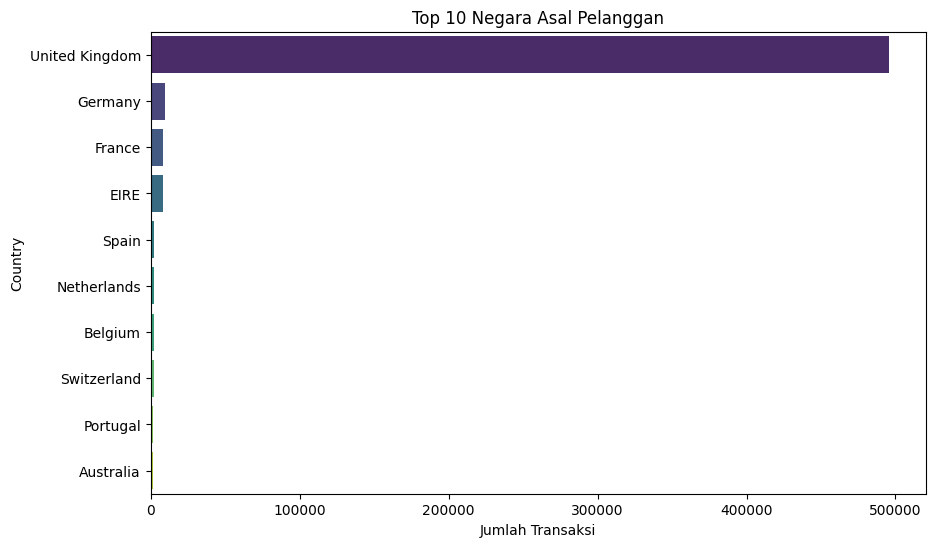

In [39]:
plt.figure(figsize=(10,6))
# Hitung jumlah transaksi per negara
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Negara Asal Pelanggan')
plt.xlabel('Jumlah Transaksi')
plt.show()

/tmp/ipython-input-3583236931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


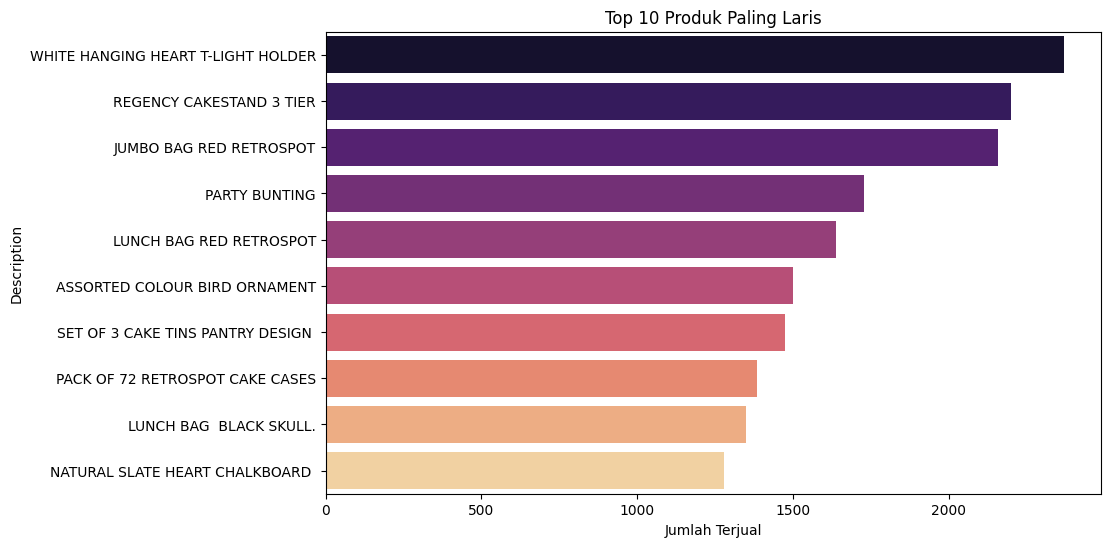

In [40]:
plt.figure(figsize=(10,6))
# Hitung produk berdasarkan frekuensi muncul di struk
top_products = df['Description'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Produk Paling Laris')
plt.xlabel('Jumlah Terjual')
plt.show()

In [41]:
df_clean = df.copy()

#membersihkan baris yang customerID nya kosong
df_clean = df_clean.dropna(subset=['CustomerID'])

#membersihkan transaksi minus
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

#membersihkan data duplikat
df_clean = df_clean.drop_duplicates()

In [42]:
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [43]:
print(f"Data Awal: {df.shape}")
print(f"Data Setelah Cleaning: {df_clean.shape}")
print("\nCek Statistik Baru (Harusnya Min Quantity & Price > 0):")
print(df_clean[['Quantity', 'UnitPrice']].describe())
print("\nCek Missing Values (Harusnya CustomerID 0):")
print(df_clean.isnull().sum())

Data Awal: (541909, 8)
Data Setelah Cleaning: (392692, 9)

Cek Statistik Baru (Harusnya Min Quantity & Price > 0):
            Quantity      UnitPrice
count  392692.000000  392692.000000
mean       13.119702       3.125914
std       180.492832      22.241836
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000

Cek Missing Values (Harusnya CustomerID 0):
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64


In [44]:
# Tentukan Tanggal Patokan (Snapshot Date)
current_date = df_clean['InvoiceDate'].max() + pd.to_timedelta(1, unit='D')
print(f"Tanggal Patokan Analisis: {current_date}")

# Hitung RFM per Customer
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days, # Recency: Jarak hari dari tgl patokan
    'InvoiceNo': 'nunique',                                 # Frequency: Hitung jumlah struk unik
    'TotalAmount': 'sum'                                    # Monetary: Total uang belanja
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

# Hasilnya
print("\n--- Tabel RFM (5 Data Teratas) ---")
print(rfm.head())

print("\n--- Info Tabel RFM ---")
print(rfm.describe())

Tanggal Patokan Analisis: 2011-12-10 12:50:00

--- Tabel RFM (5 Data Teratas) ---
            Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2          7   4310.00
12348            75          4   1797.24
12349            19          1   1757.55
12350           310          1    334.40

--- Info Tabel RFM ---
           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422     4.272015    2048.688081
std     100.014169     7.697998    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     306.482500
50%      51.000000     2.000000     668.570000
75%     142.000000     5.000000    1660.597500
max     374.000000   209.000000  280206.020000


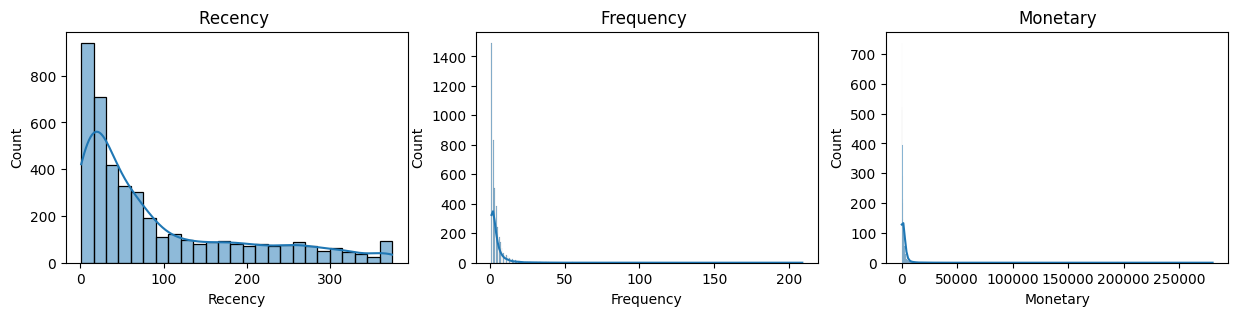

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(rfm['Recency'], kde=True, ax=ax[0])
ax[0].set_title('Recency ')
sns.histplot(rfm['Frequency'], kde=True, ax=ax[1])
ax[1].set_title('Frequency ')
sns.histplot(rfm['Monetary'], kde=True, ax=ax[2])
ax[2].set_title('Monetary')
plt.show()

In [46]:
rfm_log = np.log1p(rfm)
scaler = StandardScaler()
rfm_scaled_array = scaler.fit_transform(rfm_log)
rfm_scaled = pd.DataFrame(rfm_scaled_array, index=rfm.index, columns=rfm.columns)
print("Data Setelah Scaling :")
print(rfm_scaled.head())

print("\nCek Statistik Baru (Rata-rata/Mean harus mendekati 0):")
print(rfm_scaled.describe().round(2))

Data Setelah Scaling :
             Recency  Frequency  Monetary
CustomerID                               
12346       1.461993  -0.955214  3.707716
12347      -2.038734   1.074425  1.414903
12348       0.373104   0.386304  0.720024
12349      -0.623086  -0.955214  0.702287
12350       1.424558  -0.955214 -0.614514

Cek Statistik Baru (Rata-rata/Mean harus mendekati 0):
       Recency  Frequency  Monetary
count  4338.00    4338.00   4338.00
mean     -0.00      -0.00     -0.00
std       1.00       1.00      1.00
min      -2.34      -0.96     -4.00
25%      -0.66      -0.96     -0.68
50%       0.09      -0.36     -0.07
75%       0.84       0.65      0.66
max       1.56       5.86      4.73


**Model KMEANS**

In [47]:
k_range = range(2, 11)
inertia_scores = []
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)

    inertia_scores.append(kmeans.inertia_)

    sil_score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    print(f"K={k}, Silhouette Score={sil_score:.4f}")

K=2, Silhouette Score=0.4330
K=3, Silhouette Score=0.3361
K=4, Silhouette Score=0.3348
K=5, Silhouette Score=0.3137
K=6, Silhouette Score=0.3150
K=7, Silhouette Score=0.2955
K=8, Silhouette Score=0.2771
K=9, Silhouette Score=0.2810
K=10, Silhouette Score=0.2774


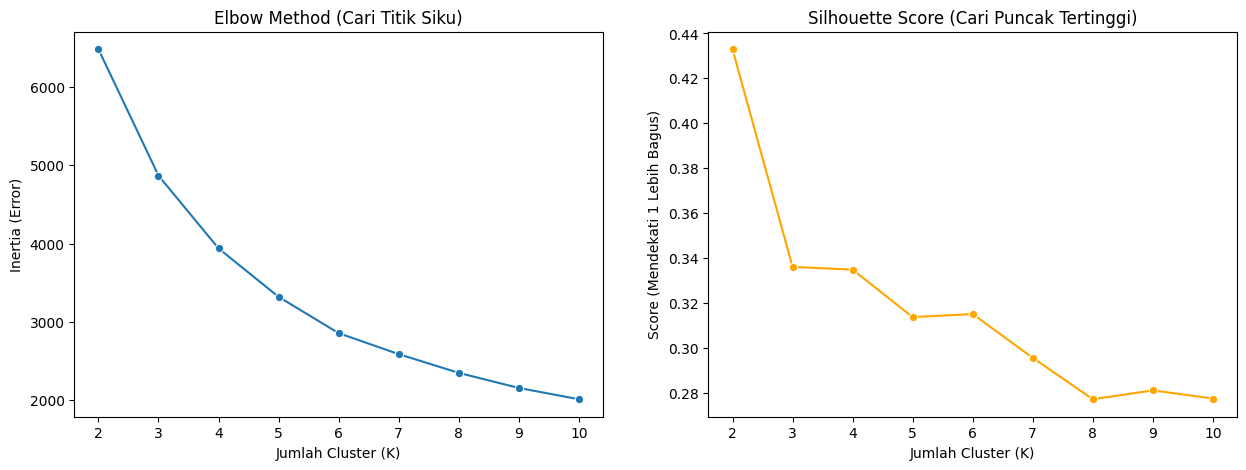

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Grafik 1: Elbow Method (Cari Siku)
sns.lineplot(x=k_range, y=inertia_scores, marker='o', ax=ax[0])
ax[0].set_title('Elbow Method (Cari Titik Siku)')
ax[0].set_xlabel('Jumlah Cluster (K)')
ax[0].set_ylabel('Inertia (Error)')

# Grafik 2: Silhouette Score (Cari Puncak Tertinggi)
sns.lineplot(x=k_range, y=silhouette_scores, marker='o', color='orange', ax=ax[1])
ax[1].set_title('Silhouette Score (Cari Puncak Tertinggi)')
ax[1].set_xlabel('Jumlah Cluster (K)')
ax[1].set_ylabel('Score (Mendekati 1 Lebih Bagus)')

plt.show()

In [49]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(rfm_scaled)
rfm['Cluster_Labels'] = kmeans_final.labels_
print("Data dengan Label Cluster:")
print(rfm.head())
cluster_summary = rfm.groupby('Cluster_Labels').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Cluster_Labels': 'count' # Hitung jumlah orangnya
}).rename(columns={'Cluster_Labels': 'Jumlah_Pelanggan'})

print("\n--- Rata-rata Profil Setiap Cluster ---")
print(cluster_summary.round(2))

Data dengan Label Cluster:
            Recency  Frequency  Monetary  Cluster_Labels
CustomerID                                              
12346           326          1  77183.60               2
12347             2          7   4310.00               1
12348            75          4   1797.24               2
12349            19          1   1757.55               0
12350           310          1    334.40               3

--- Rata-rata Profil Setiap Cluster ---
                Recency  Frequency  Monetary  Jumlah_Pelanggan
Cluster_Labels                                                
0                 20.05       2.01    510.28               856
1                 11.74      13.78   8107.55               707
2                 66.72       4.17   1819.25              1185
3                186.73       1.34    353.81              1590


In [50]:
segment_map = {
    0: 'Potential',
    1: 'VIP',
    2: 'Loyal',
    3: 'At Risk'
}

# Menerapkan ke DataFrame
rfm['Segment_Name'] = rfm['Cluster_Labels'].map(segment_map)

# Cek Hasilnya
print("Data dengan Nama Segmen:")
print(rfm[['Recency', 'Frequency', 'Monetary', 'Segment_Name']].head(10))

# Hitung Jumlah Pelanggan per Segmen (Biar tahu proporsinya)
print("\n--- Jumlah Pelanggan per Segmen ---")
print(rfm['Segment_Name'].value_counts())

Data dengan Nama Segmen:
            Recency  Frequency  Monetary Segment_Name
CustomerID                                           
12346           326          1  77183.60        Loyal
12347             2          7   4310.00          VIP
12348            75          4   1797.24        Loyal
12349            19          1   1757.55    Potential
12350           310          1    334.40      At Risk
12352            36          8   2506.04        Loyal
12353           204          1     89.00      At Risk
12354           232          1   1079.40      At Risk
12355           214          1    459.40      At Risk
12356            23          3   2811.43        Loyal

--- Jumlah Pelanggan per Segmen ---
Segment_Name
At Risk      1590
Loyal        1185
Potential     856
VIP           707
Name: count, dtype: int64


/tmp/ipython-input-2772749867.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


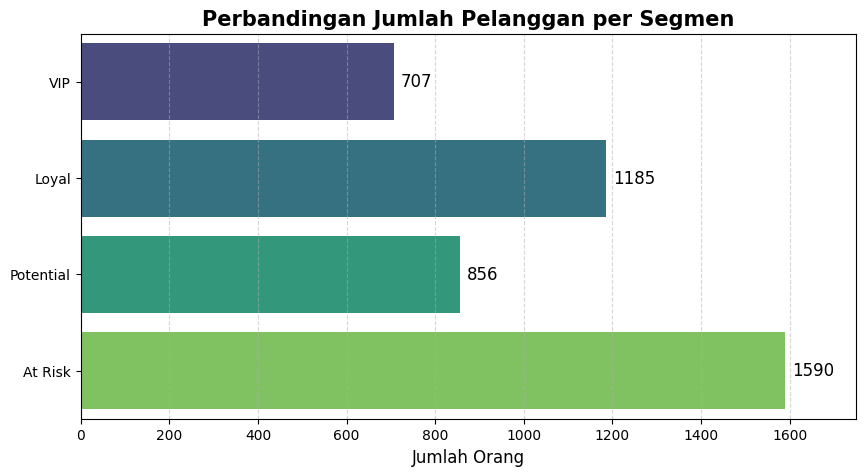

In [51]:
# Siapkan datanya berdasarkan segmen
urutan_segmen = ['VIP', 'Loyal', 'Potential', 'At Risk']
data_visual = rfm['Segment_Name'].value_counts().reindex(urutan_segmen).reset_index()
data_visual.columns = ['Segment', 'Jumlah_Pelanggan']

# Plotnya
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=data_visual,
    y='Segment',
    x='Jumlah_Pelanggan',
    palette='viridis'
)

# (Judul & Label)
plt.title('Perbandingan Jumlah Pelanggan per Segmen', fontsize=15, fontweight='bold')
plt.xlabel('Jumlah Orang', fontsize=12)
plt.ylabel('') # Kosongkan label Y biar bersih
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Memunculkan Angka di Ujung Batang
for container in ax.containers:
    ax.bar_label(container, padding=5, fontsize=12)
plt.xlim(right=data_visual['Jumlah_Pelanggan'].max() * 1.1)
plt.show()

**Model DBSCAN**

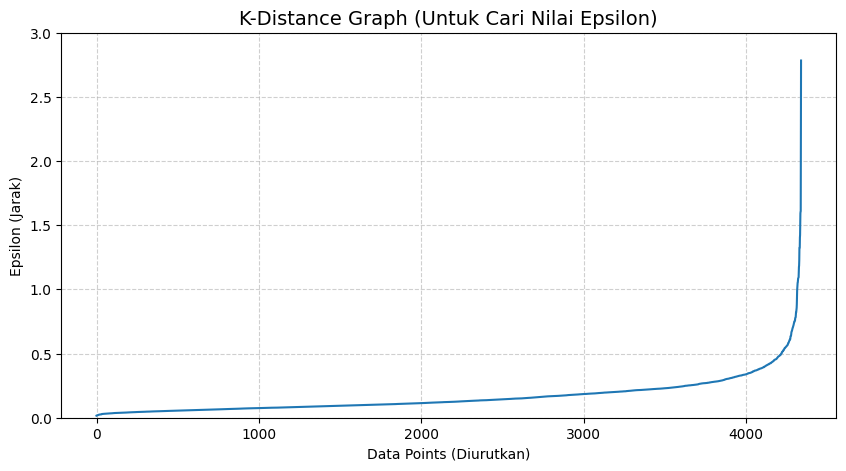

In [52]:
# Menentukan Epsilon
min_pts = 6

#Hitung jarak Epsilon
neighbors = NearestNeighbors(n_neighbors=min_pts)
neighbors_fit = neighbors.fit(rfm_scaled)
distances, indices = neighbors_fit.kneighbors(rfm_scaled)

# Mengurutkan jakar dari yang terkecil ke terbesar
distances = np.sort(distances[:, min_pts-1], axis=0)

#Grafik
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-Distance Graph (Untuk Cari Nilai Epsilon)', fontsize=14)
plt.xlabel('Data Points (Diurutkan)')
plt.ylabel('Epsilon (Jarak)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 3)

plt.show()

In [53]:
# Parameter sesuai grafik
dbscan = DBSCAN(eps=0.5, min_samples=6)

# Melatih daan simpan model
dbscan.fit(rfm_scaled)
rfm['DBSCAN_Labels'] = dbscan.labels_

# Hasil bagi kelompok
print("Jumlah Pelanggan per Cluster DBSCAN ")
print(rfm['DBSCAN_Labels'].value_counts())

print("\n--- Contoh Data Noise (Label -1) ---")
print(rfm[rfm['DBSCAN_Labels'] == -1].head())

Jumlah Pelanggan per Cluster DBSCAN 
DBSCAN_Labels
 0    2788
 1    1484
-1      64
 2       2
Name: count, dtype: int64

--- Contoh Data Noise (Label -1) ---
            Recency  Frequency   Monetary  Cluster_Labels Segment_Name  \
CustomerID                                                               
12346           326          1   77183.60               2        Loyal   
12357            33          1    6207.67               2        Loyal   
12409            79          3   11072.67               2        Loyal   
12415            24         21  124914.53               1          VIP   
12433             1          7   13375.87               1          VIP   

            DBSCAN_Labels  
CustomerID                 
12346                  -1  
12357                  -1  
12409                  -1  
12415                  -1  
12433                  -1  


**Visualisasi perbandingan**

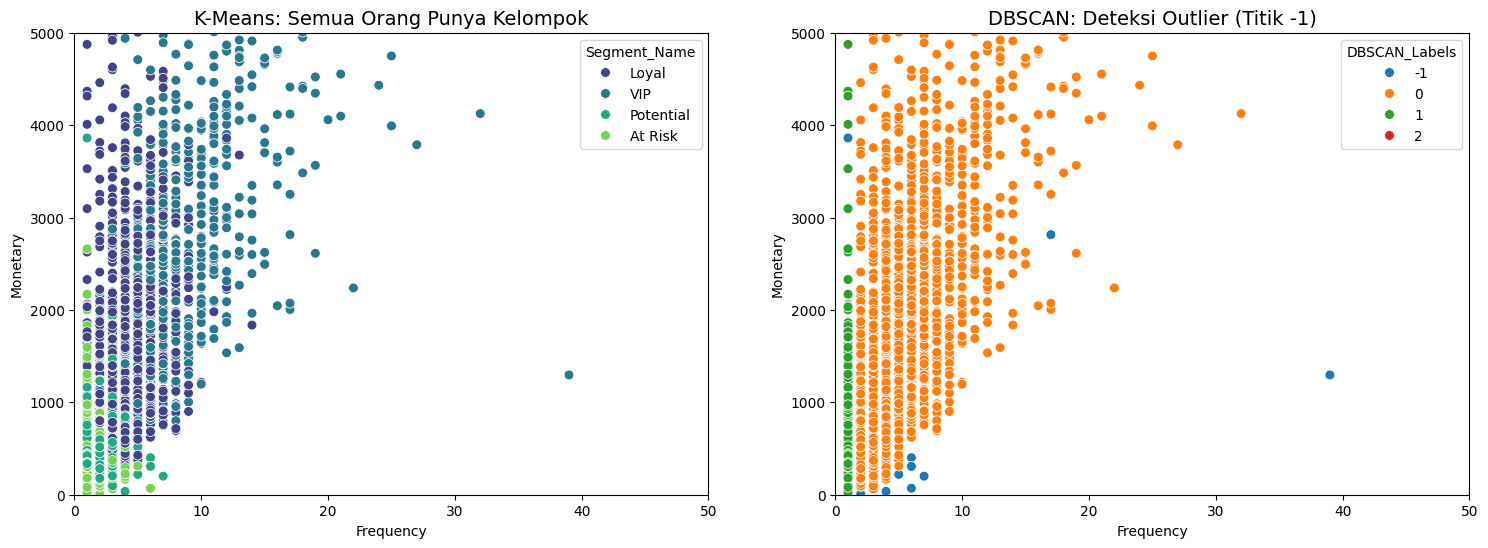

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Grafik Kmeans
sns.scatterplot(
    data=rfm, x='Frequency', y='Monetary',
    hue='Segment_Name', palette='viridis', s=50, ax=ax[0]
)
ax[0].set_title('K-Means: Semua Orang Punya Kelompok', fontsize=14)
ax[0].set_xlim(0, 50)
ax[0].set_ylim(0, 5000)

# Grafik DBScan
sns.scatterplot(
    data=rfm, x='Frequency', y='Monetary',
    hue='DBSCAN_Labels', palette='tab10', s=50, ax=ax[1]
)
ax[1].set_title('DBSCAN: Deteksi Outlier (Titik -1)', fontsize=14)
ax[1].set_xlim(0, 50)
ax[1].set_ylim(0, 5000)

plt.show()

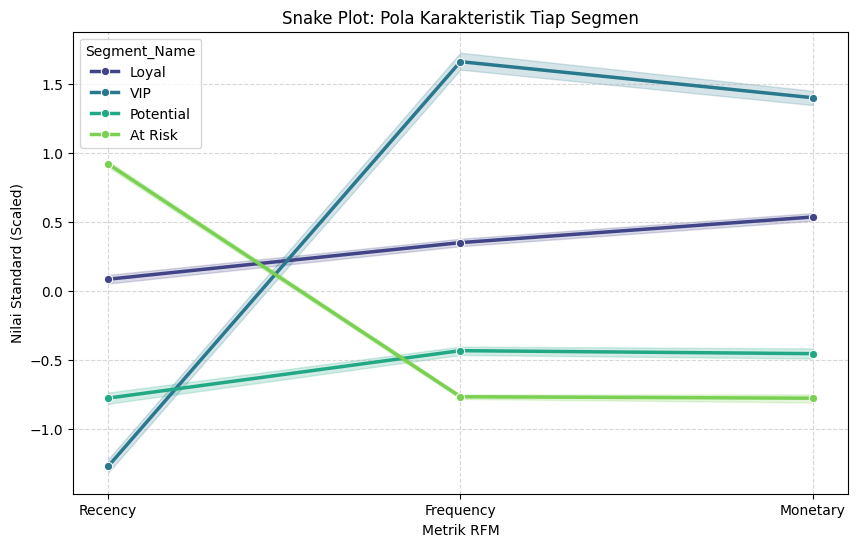

In [55]:
# 1. Siapkan Data
# Masukkan label segmen ke data yang sudah di-scaling
rfm_scaled['Segment_Name'] = rfm['Segment_Name']

# Melt data menjadi format panjang
rfm_melted_scaled = rfm_scaled.melt(
    id_vars=['Segment_Name'],
    value_vars=['Recency', 'Frequency', 'Monetary'],
    var_name='Metric',
    value_name='Value'
)

# 2. Gambar Snake Plot
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=rfm_melted_scaled,
    x='Metric',
    y='Value',
    hue='Segment_Name',
    palette='viridis',
    marker="o", # Pakai titik bulat di tiap garis
    linewidth=2.5
)

plt.title('Snake Plot: Pola Karakteristik Tiap Segmen')
plt.ylabel('Nilai Standard (Scaled)')
plt.xlabel('Metrik RFM')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()